<h1  style = "text-align:center;font-size:40px;font-family:courier">Movie Visualization & Recommendation System</h1>


The goal is to leverage the custom dataset containing information about top Netflix movies and TV shows to perform insightful feature extraction and potentially build a recommendation system or a genre prediction model. This involves extracting relevant features from the dataset to better understand and represent the content. Additionally, the problem can be approached in two ways:

1. **Recommendation System:**
   - Build a recommendation system to suggest movies or TV shows based on user preferences.
   - Utilize collaborative filtering, content-based filtering, or a hybrid approach.
   - Evaluate the performance of the recommendation system using appropriate metrics.

2. **Genre Prediction Model:**
   - Develop a model that predicts the genre(s) of a movie or TV show.
   - Extract features such as keywords, actors, directors, and more to represent content.
   - Evaluate the accuracy of the genre predictions and explore the most important features.

**Key Considerations:**
   - Understand the structure and content of the dataset.
   - Explore and preprocess the data to handle missing values, outliers, or inconsistencies.
   - Identify relevant features for recommendation or genre prediction.
   - Split the dataset into training and testing sets for model evaluation.
   - Choose appropriate machine learning or recommendation algorithms.
   - Evaluate the model's performance and iterate on improvements if needed.

**Success Criteria:**
   - For a recommendation system, success can be measured by the accuracy of predictions and user satisfaction.
   - For a genre prediction model, success can be measured by the accuracy of genre predictions on unseen data.

**Deliverables:**
   - A well-documented Jupyter notebook or code that includes data exploration, feature extraction, model development, and evaluation.
   - Visualization of key insights and findings from the dataset.
   - A working recommendation system or genre prediction model.


<h2> Dataset Overview: </h2>

1. **Movies Column:**
   - Contains the names of movies or TV shows.

2. **Year Column:**
   - Represents the year of release or telecast.

3. **Genre Column:**
   - Contains information about the genre(s) of the movies or TV shows. Valuable for building a recommendation system.

4. **Rating Column:**
   - Indicates the audience's rating for each movie or TV show.

5. **One-Line Column:**
   - Provides a short description for audiences to get a quick impression of the content.

6. **Stars Column:**
   - Lists the casting information, which is crucial for understanding the cast of each art piece.

7. **Votes Column:**
   - Represents the number of votes, indicating the level of audience engagement.

8. **Runtime Column:**
   - Specifies the duration of the running time for each movie or TV show.

9. **Gross Column:**
   - Provides information about the total earnings worldwide.




## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

## Data Collection

In [2]:
dataset_url = "/content/Movies Data.csv"
df = pd.read_csv(dataset_url)
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


## Data Preprocessing

### Cleaning some of the features

In [ ]:
# Removing "\n" from GENRE, ONE-LINE, and STARS columns
for col in ['GENRE','ONE-LINE','STARS']:
    df[col] = df[col].str.replace("\n","").str.strip()

df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...","414,849",23.0,NaN
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:Matt...,NaN,NaN,NaN


### Basic Overview of dataset

In [ ]:
df.columns

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime', 'Gross'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [ ]:
df.shape

(9999, 9)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RATING,8179.0,6.921176,1.220232,1.1,6.2,7.1,7.8,9.9
RunTime,7041.0,68.688539,47.258056,1.0,36.0,60.0,95.0,853.0


### Handling missing values

In [ ]:
# Check for missing values
df.isnull().sum()


MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [ ]:
print("Missing Values:\n")
for col in movie.columns:
    missing = movie[col].isna().sum()
    percent = missing / movie.shape[0] * 100
    print(f"{col:10} | {missing:6} missing values | {percent:5.2f}% missing")



Missing Values:

MOVIES     |      0 missing values |  0.00% missing
YEAR       |    644 missing values |  6.44% missing
GENRE      |      0 missing values |  0.00% missing
RATING     |   1820 missing values | 18.20% missing
ONE-LINE   |      0 missing values |  0.00% missing
STARS      |      0 missing values |  0.00% missing
VOTES      |      0 missing values |  0.00% missing
RunTime    |   2958 missing values | 29.58% missing
Gross      |   9539 missing values | 95.40% missing
Director   |      0 missing values |  0.00% missing
Stars      |      0 missing values |  0.00% missing
Year       |      0 missing values |  0.00% missing
combined_features |      0 missing values |  0.00% missing


* The "Gross" column has a very high percentage (95.4%) of missing values, suggesting that this feature may not be reliable for analysis or might need imputation.
* "RunTime" also has a substantial amount (29.58%) of missing values, indicating that information about the duration of the movies is incomplete for a significant portion of the dataset.
* "MOVIES," "ONE-LINE," and "STARS" have no missing values, indicating complete information in these columns

array([[<Axes: title={'center': 'RATING'}>,
        <Axes: title={'center': 'RunTime'}>]], dtype=object)

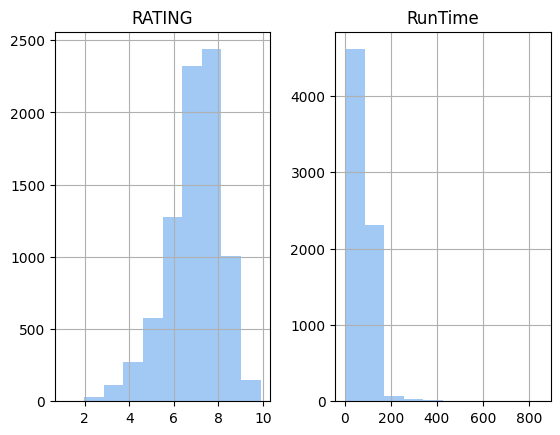

In [ ]:
df.hist()

In [ ]:
## Impute or Handle Missing Values
# Assuming df is your dataframe
df['YEAR'].fillna(df['YEAR'].mode().iloc[0], inplace=True)
df['GENRE'].fillna(df['GENRE'].mode()[0], inplace=True)
df['RATING'].fillna(df['RATING'].mean(), inplace=True)
df['VOTES'].fillna(0, inplace=True)  # Assuming missing votes can be considered as zero
df['RunTime'].fillna(df['RunTime'].median(), inplace=True)


In [ ]:
if 'Gross' in df.columns:
  df.drop('Gross',axis = 1, inplace = True)

In [ ]:
df.isnull().sum()

MOVIES      0
YEAR        0
GENRE       0
RATING      0
ONE-LINE    0
STARS       0
VOTES       0
RunTime     0
dtype: int64

### Handling Outliers

<Axes: xlabel='RunTime'>

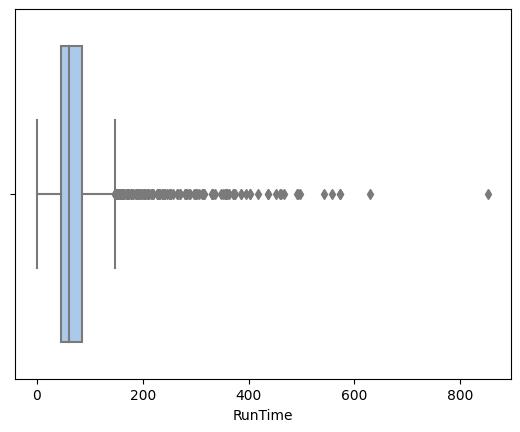

In [ ]:
sns.boxplot(x= df['RunTime'])

<Axes: xlabel='RATING'>

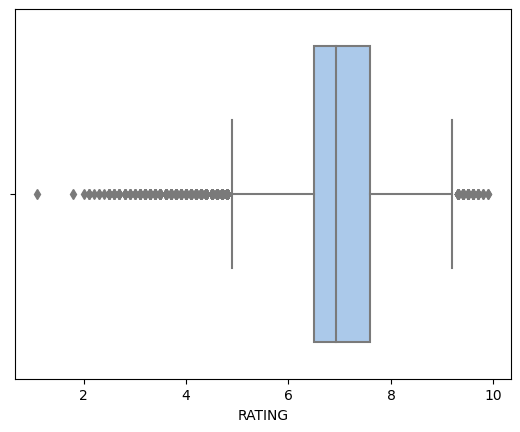

In [ ]:
sns.boxplot(x= df['RATING'])

There are diverse ranges in RunTime in Rantings column

In [ ]:
# Assuming 'RunTime' is the numerical column you want to analyze
# Replace 'RunTime' with the actual column name if needed

# Calculate the IQR (Interquartile Range)
Q1 = df['RunTime'].quantile(0.25)
Q3 = df['RunTime'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['RunTime'] < lower_bound) | (df['RunTime'] > upper_bound)]

# Calculate the percentage of outliers
percentage_outliers = (len(outliers) / len(df)) * 100

# Display the result
print(f"Percentage of outliers: {percentage_outliers:.2f}%")


Percentage of outliers: 1.84%


In [ ]:
# Assuming 'RunTime' is the numerical column you want to analyze
# Replace 'RunTime' with the actual column name if needed

# Calculate the IQR (Interquartile Range)
Q1 = df['RATING'].quantile(0.25)
Q3 = df['RATING'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['RATING'] < lower_bound) | (df['RATING'] > upper_bound)]

# Calculate the percentage of outliers
percentage_outliers = (len(outliers) / len(df)) * 100

# Display the result
print(f"Percentage of outliers: {percentage_outliers:.2f}%")


Percentage of outliers: 6.07%


We currently dont know significance of outliers. Data points mighht be genuine data points so we are not dropping outliers at this stage. We will think of dropping outliers in an experimenting after we train our first model.

In [ ]:
df.columns

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime'],
      dtype='object')

In [ ]:
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.100000,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.000000,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.200000,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44.0
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.200000,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...","414,849",23.0
4,Army of Thieves,(2021),"Action, Crime, Horror",6.921176,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:Matt...,0,60.0
...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"Adventure, Drama, Fantasy",6.921176,Add a Plot,"Stars:Morgan Taylor Campbell, Chris Cope, Iñak...",0,60.0
9995,Arcane,(2021– ),"Animation, Action, Adventure",6.921176,Add a Plot,,0,60.0
9996,Heart of Invictus,(2022– ),"Documentary, Sport",6.921176,Add a Plot,Director:Orlando von Einsiedel| Star:Princ...,0,60.0
9997,The Imperfects,(2021– ),"Adventure, Drama, Fantasy",6.921176,Add a Plot,Director:Jovanka Vuckovic| Stars:Morgan Ta...,0,60.0


In [ ]:
df[df.duplicated()]

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
6833,Mighty Little Bheem,(2019– ),"Animation, Short, Adventure",6.921176,Add a Plot,"Directors:Rajiv Chilaka, Krishna Mohan Chintap...",0,60.0
6835,Mighty Little Bheem,(2019– ),"Animation, Short, Adventure",9.000000,Add a Plot,"Directors:Rajiv Chilaka, Krishna Mohan Chintap...",6,60.0
6836,Mighty Little Bheem,(2019– ),"Animation, Short, Adventure",9.000000,Add a Plot,"Directors:Rajiv Chilaka, Krishna Mohan Chintap...",6,60.0
6837,Mighty Little Bheem,(2019– ),"Animation, Short, Adventure",6.921176,Add a Plot,"Directors:Rajiv Chilaka, Krishna Mohan Chintap...",0,60.0
6838,Mighty Little Bheem,(2019– ),"Animation, Short, Adventure",6.921176,Add a Plot,"Directors:Rajiv Chilaka, Krishna Mohan Chintap...",0,60.0
...,...,...,...,...,...,...,...,...
9989,1899,(2022– ),"Drama, History, Horror",6.921176,Add a Plot,Director:Baran bo Odar,0,60.0
9990,1899,(2022– ),"Drama, History, Horror",6.921176,Add a Plot,Director:Baran bo Odar,0,60.0
9991,1899,(2022– ),"Drama, History, Horror",6.921176,Add a Plot,Director:Baran bo Odar,0,60.0
9992,1899,(2022– ),"Drama, History, Horror",6.921176,Add a Plot,Director:Baran bo Odar,0,60.0


In [ ]:

duplicates_in_column = df.duplicated().sum()

# Display the rows with duplicate values in the specified column (if any)
print(f"Rows with Duplicate Values in column MOVIES :", duplicates_in_column)


Rows with Duplicate Values in column MOVIES : 431


In [ ]:
df.columns

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime'],
      dtype='object')

We will drop all the duplicate movies names records

In [ ]:
# Remove rows with duplicate values in the specified column
df_no_duplicate_values = df.drop_duplicates()

# Display the shape of the DataFrame after removing duplicates
print(f"Shape of DataFrame after removing duplicate values: {df_no_duplicate_values.shape}")


Shape of DataFrame after removing duplicate values: (9568, 8)


We have successfully handled data validation, missing data , outliers and duplicate values.

## Lets start EDA

In [ ]:
# Creating New Column Director and Stars by extracting Director(s) and Stars from original STARS column
def extract_director(direc):
    if 'Director' in direc or 'Directors' in direc:
        director = direc.strip().split("|")[0]  # The Second Half is the stars
        return director.split(":")[1]  # Return the Director name
    else:
        return ''

def extract_stars(stars):
    if 'Star' not in stars or 'Stars' not in stars:
        return ''
    else:
        return stars.split(":")[-1]  # Last value in this list will be the stars

df['Director'] = df['STARS'].apply(lambda d: extract_director(d))
df['Stars'] = df['STARS'].apply(lambda s: extract_stars(s))

# View head of these columns
df[['STARS', 'Director', 'Stars']].head()


,STARS,Director,Stars
0,Director:Peter Thorwarth| Stars:Peri Baume...,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...",,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...",,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,"Stars:Justin Roiland, Chris Parnell, Spencer G...",,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Director:Matthias Schweighöfer| Stars:Matt...,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."


<h3 style = "text-align:center;font-size:30px;font-family:courier">Data Visualization</h3>

### Years

In [ ]:
# Assuming 'YEAR' is the column containing various date formats
# Replace 'YEAR' with the actual column name if needed
# Replace df with the actual DataFrame name

df['Year'] = df['YEAR'].str.extract(r'([0-9]{4}–.*|[0-9]{4})')
df['Year'] = df['Year'].str.strip().replace(")","")

def extract_year(year):
    if year[-3:] == '– )':
        return year.replace('– )', '–')
    else:
        return year.replace(')', "")

df['Year'] = df['Year'].fillna('Unknown')
df['Year'] = df['Year'].apply(lambda y: extract_year(y))

year_count = df[df['Year'] != 'Unknown']['Year'].value_counts().reset_index().rename(columns = {'Year':'Count','index':'Year'})
year_count.head()

,Year,Count
0,2020–,1542
1,2020,742
2,2021–,661
3,2019,657
4,2019–,553


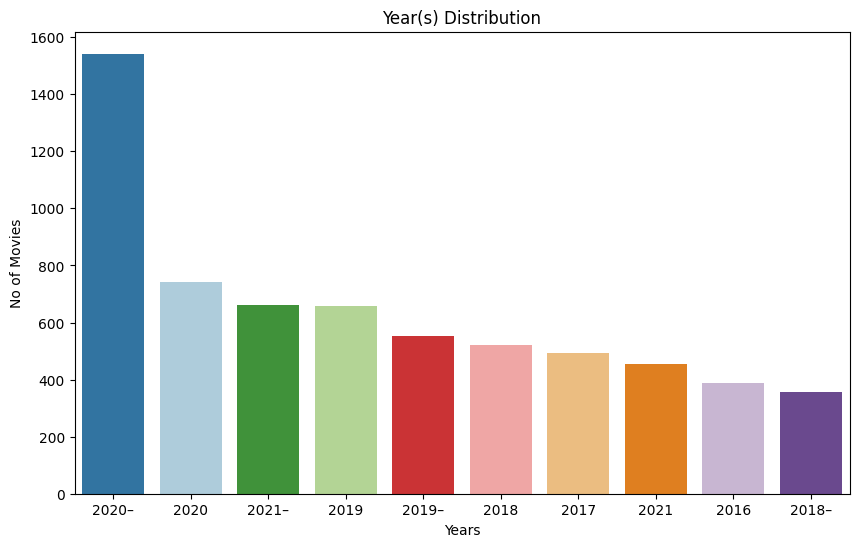

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named year_count with columns 'Year' and 'Count'
# Adjust the DataFrame name and column names based on your actual data

# Custom color codes for each bar
colors = ['#1f78b4', '#a6cee3', '#33a02c', '#b2df8a', '#e31a1c', '#fb9a99', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a']

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Count', data=year_count.head(10), palette=colors)

plt.title('Year(s) Distribution')
plt.xlabel('Years')
plt.ylabel('No of Movies')
plt.show()


### Rating

In [ ]:
print(f"Statistical value of Rating")

# Average Rating
print("Mean:", round(df['RATING'].mean(), 2))

# Median Rating
print("Median:", round(df['RATING'].median(),2))

# Max Rating
print("Max:", df['RATING'].max())


Statistical value of Rating
Mean: 6.92
Median: 6.92
Max: 9.9


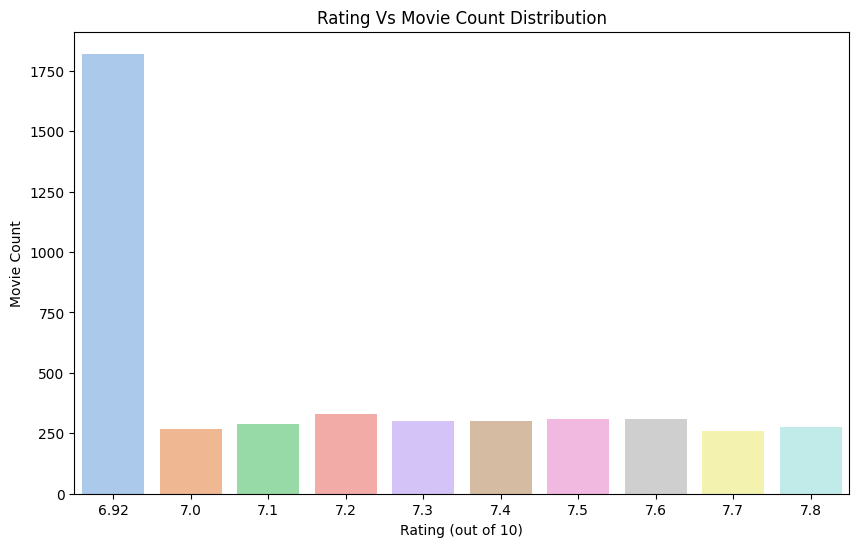

In [ ]:
# Round the 'RATING' column to 2 decimal places
df['RATING'] = df['RATING'].round(2)

plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='RATING', data=df['RATING'].value_counts().reset_index().head(10))

plt.title('Rating Vs Movie Count Distribution')
plt.ylabel('Movie Count')
plt.xlabel('Rating (out of 10)')

plt.show()

### RunTime

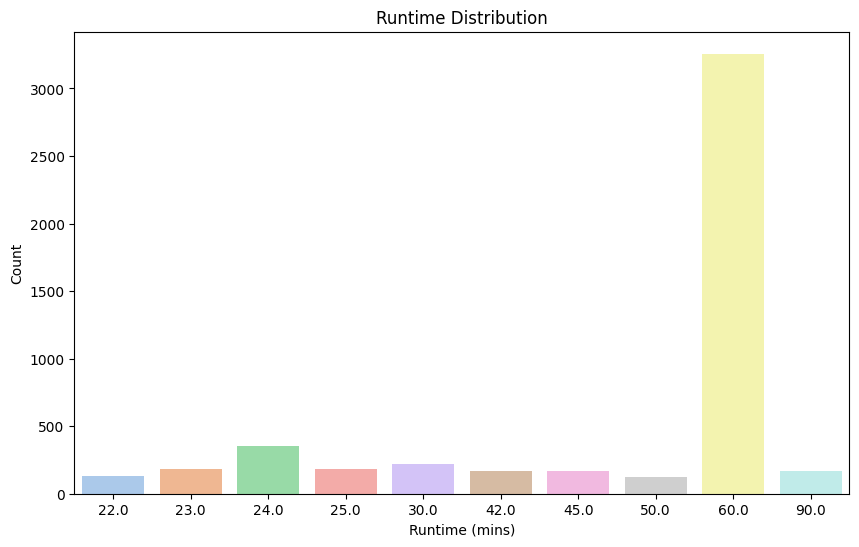

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='RunTime', data=df['RunTime'].value_counts().reset_index().head(10))

plt.title('Runtime Distribution')
plt.ylabel('Count')
plt.xlabel('Runtime (mins)')

plt.show()

### Voting

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9999 non-null   object 
 2   GENRE     9999 non-null   object 
 3   RATING    9999 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     9999 non-null   object 
 7   RunTime   9999 non-null   float64
 8   Director  9999 non-null   object 
 9   Stars     9999 non-null   object 
 10  Year      9999 non-null   object 
dtypes: float64(2), object(9)
memory usage: 859.4+ KB


In [ ]:
df['VOTES'] = df['VOTES'].str.replace(",","")
df['VOTES']

0        21062
1        17870
2       885805
3       414849
4          NaN
         ...  
9994       NaN
9995       NaN
9996       NaN
9997       NaN
9998       NaN
Name: VOTES, Length: 9999, dtype: object

In [ ]:
df['VOTES'] = df['VOTES'].fillna(0)
df['VOTES'] = df['VOTES'].astype(int)
df['VOTES'].sort_values(ascending = False)

111     1713028
193     1691777
16      1552311
260     1529752
132     1227522
         ...   
7039          0
7040          0
7041          0
7042          0
9998          0
Name: VOTES, Length: 9999, dtype: int64

### Genre

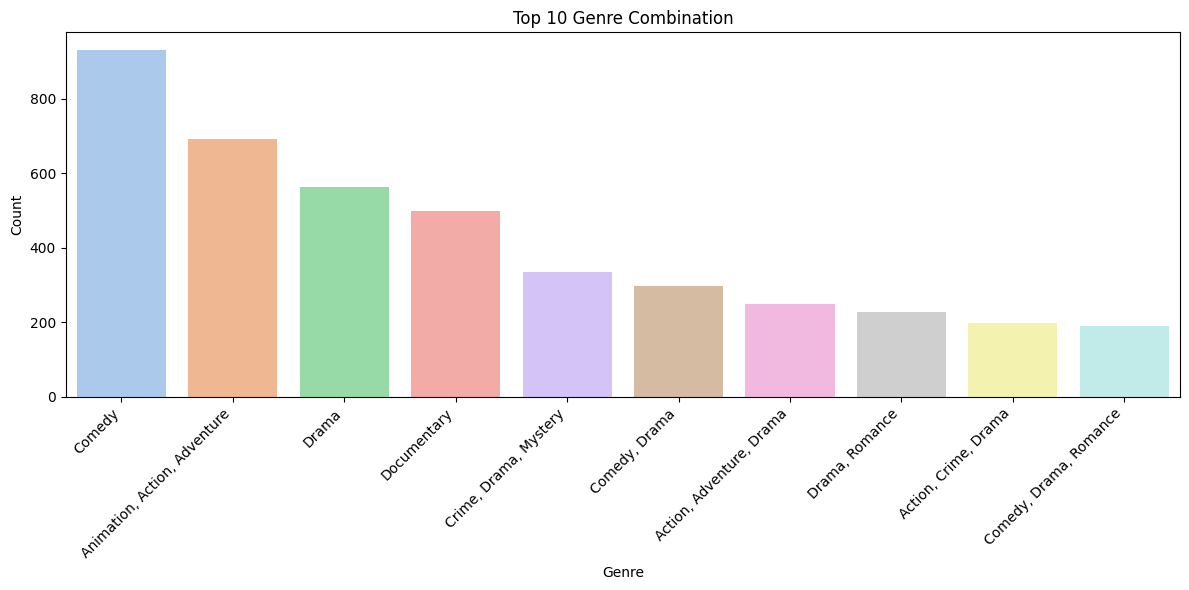

In [ ]:
df_genre = df['GENRE'].value_counts().reset_index().rename(columns={'GENRE': 'Count', 'index': 'Genre'})

# Sort the DataFrame by count in descending order and take the top 10
df_genre_top10 = df_genre.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Count', data=df_genre_top10)

plt.title('Top 10 Genre Combination')
plt.ylabel('Count')
plt.xlabel('Genre')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

### Looking at Individual Genre

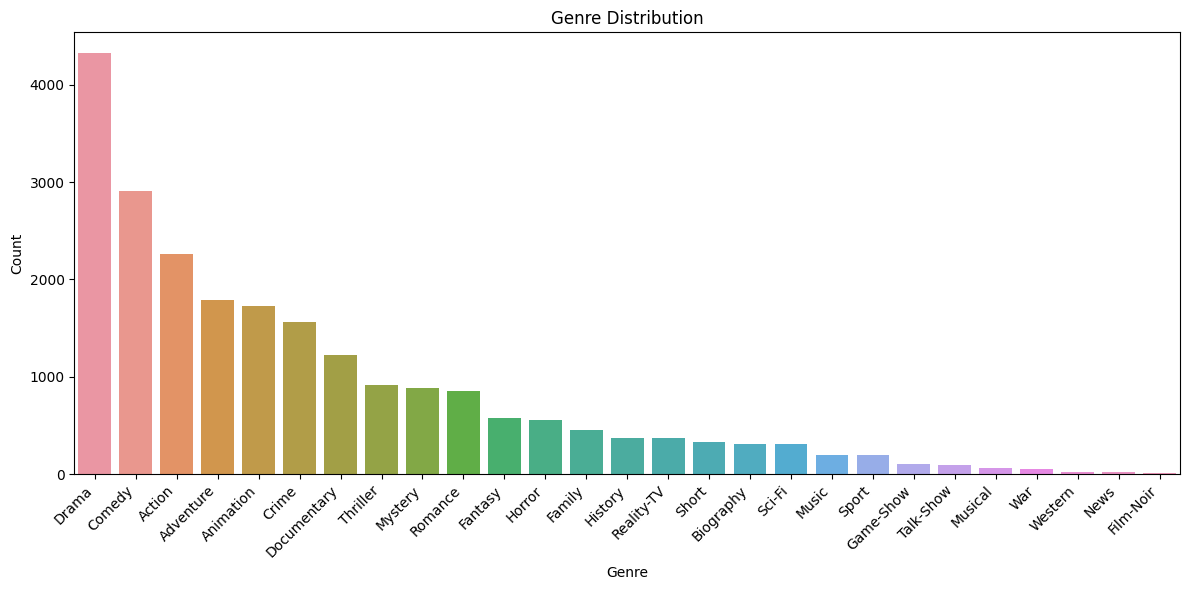

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Assuming you have a DataFrame named df with a column 'GENRE'
# Adjust the DataFrame name and column names based on your actual data

# Drop missing values and convert 'GENRE' column to a list
genre_raw = df['GENRE'].dropna().to_list()
genre_list = list()

# Extract individual genres and create a list
for genres in genre_raw:
    genres = genres.split(", ")
    for g in genres:
        genre_list.append(g)

# Create a DataFrame from the Counter of genres
genre_df = pd.DataFrame.from_dict(Counter(genre_list), orient='index').rename(columns={0: 'Count'})

# Sort the DataFrame by count in descending order
genre_df_sorted = genre_df.sort_values(by='Count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_df_sorted.index, y='Count', data=genre_df_sorted)

plt.title('Genre Distribution')
plt.ylabel('Count')
plt.xlabel('Genre')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()


In [ ]:
# !pip install plotly --upgrade

In [ ]:
# Genre Count Ditribution
fig = px.pie(data_frame = genre_df,
             values = 'Count',
             names = genre_df.index,
             color_discrete_sequence = px.colors.qualitative.Safe)

fig.update_traces(textposition = 'inside',
                  textinfo = 'label+percent',
                  pull = [0.05] * len(genre_df.index.to_list()))

fig.update_layout(title = {'text':'Genre Distribution'},
                  legend_title = 'Gender',
                  uniformtext_minsize=13,
                  uniformtext_mode='hide',
                  font = dict(
                      family = "Courier New, monospace",
                      size = 18,
                      color = 'black'
                  ))


fig.show(renderer='colab')

### Director

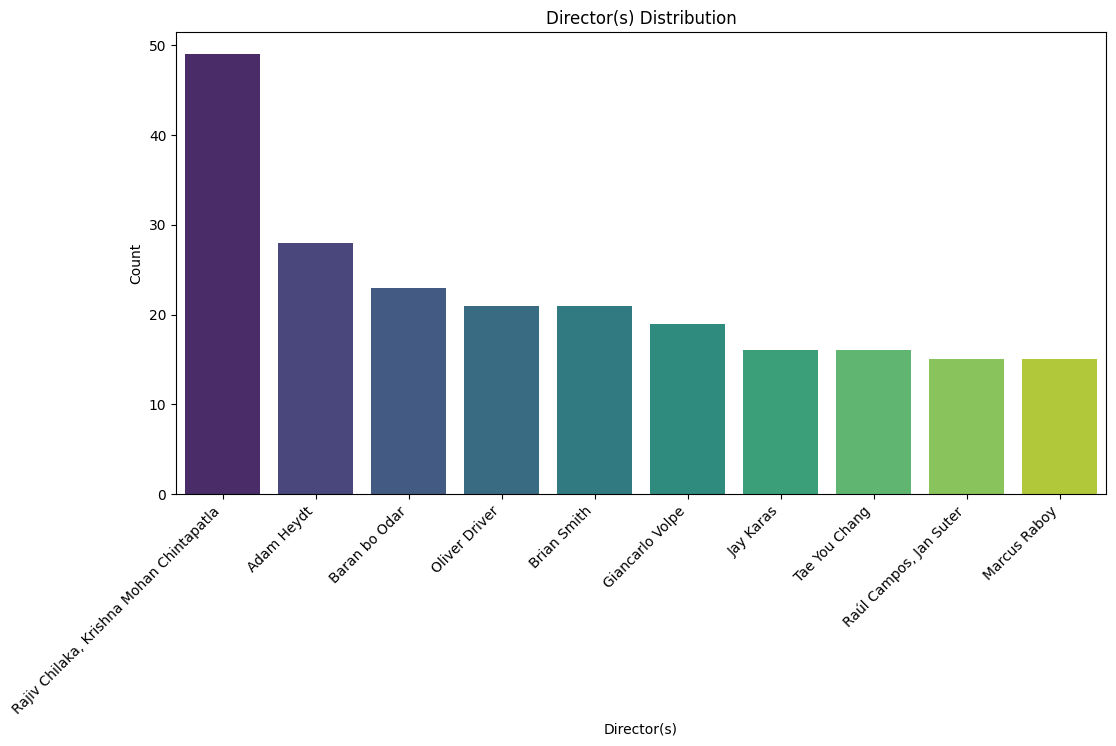

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with a column 'Director'
# Adjust the DataFrame name and column names based on your actual data

# Filter out rows where 'Director' is not an empty string
filtered_directors = df[df['Director'] != '']

# Get the top 10 directors
top_directors = filtered_directors['Director'].value_counts().head(10)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette="viridis")
plt.title('Director(s) Distribution')
plt.xlabel('Director(s)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.show()


### Stars

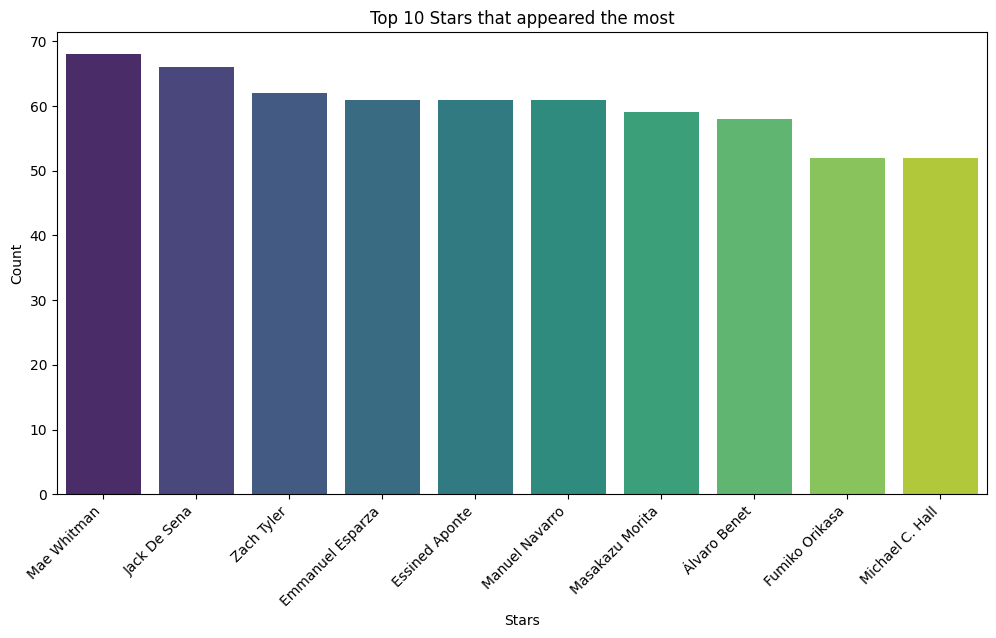

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with a column 'Stars'
# Adjust the DataFrame name and column names based on your actual data

# Filter out rows where 'Stars' is not an empty string
filtered_stars = df[df['Stars'] != ""]

# Create a list of stars
stars_list = []
for stars in filtered_stars['Stars'].to_list():
    stars = stars.split(", ")
    stars_list.extend(stars)

# Create a DataFrame from the Counter of stars
stars_df = pd.DataFrame.from_dict(Counter(stars_list), orient='index').rename(columns={0: 'Count'})
stars_df = stars_df.sort_values(by='Count', ascending=False)

# Get the top 10 stars
top_stars = stars_df.head(10)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_stars.index, y=top_stars['Count'], palette="viridis")
plt.title('Top 10 Stars that appeared the most')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9999 non-null   object 
 2   GENRE     9999 non-null   object 
 3   RATING    9999 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     9999 non-null   int64  
 7   RunTime   9999 non-null   float64
 8   Director  9999 non-null   object 
 9   Stars     9999 non-null   object 
 10  Year      9999 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.4+ KB


In [ ]:
# Assuming 'Stars' is a column in your DataFrame
# # Split the 'Stars' column into separate columns
# stars_split = df['Stars'].str.split(', ', expand=True)

# # Rename the new columns dynamically based on the maximum number of stars
# max_stars = stars_split.shape[1]
# new_columns = [f'Star_{i+1}' for i in range(max_stars)]
# stars_split.columns = new_columns

# # Concatenate the new columns with the original DataFrame
# df= pd.concat([df, stars_split], axis=1)

In [ ]:
# Assuming 'Stars' is a column in your DataFrame
# Split the 'Stars' column into separate columns
# genre_split = df['GENRE'].str.split(', ', expand=True)

# # Rename the new columns dynamically based on the maximum number of stars
# max_genre = genre_split.shape[1]
# new_columns = [f'Genre_{i+1}' for i in range(max_genre)]
# genre_split.columns = new_columns

# # Concatenate the new columns with the original DataFrame
# df= pd.concat([df, genre_split], axis=1)

In [ ]:
# df.drop(['GENRE'], inplace = True, axis = 1)

In [ ]:
# df.columns

In [ ]:
# feature_for_training  = ['VOTES', 'RATING',
#        'RunTime', 'Director', 'Star_1', 'Star_2',
#        'Star_3', 'Star_4', 'Genre_1', 'Genre_2','Genre_3']
# X = df[feature_for_training]

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()

# # Assuming df is your DataFrame and 'Star_1', 'Star_2', etc., are your columns
# for column in ['Director','Star_1', 'Star_2', 'Star_3', 'Star_4', 'Genre_1', 'Genre_2', 'Genre_3']:
#     X[column] = label_encoder.fit_transform(X[column])



In [ ]:
X.shape

(9999, 11)

Content-based Filtering Movie Recommendation System

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

features = ['GENRE','ONE-LINE','Director','Stars']
for feature in features:
    df[feature] = df[feature].fillna("")

df['combined_features'] = df['GENRE'] + " " + df['ONE-LINE'] + " " + df['Director'] + " " + df['Stars']
cv = CountVectorizer()
count_matrix = cv.fit_transform(df['combined_features'])
cosine_sim = cosine_similarity(count_matrix)


In [ ]:
def movie_recommendation(mov, sim_num=5):
    user_choice = mov

    try:
        ref_index = df[df['MOVIES'].str.contains(user_choice, case=False)].index[0]

        similar_movies = list(enumerate(cosine_sim[ref_index]))

        sorted_similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)[1:]

        print('\nRecommended Movies for [{}]'.format(user_choice))
        print('-' * (24 + len(user_choice)))

        for i, element in enumerate(sorted_similar_movies):
            similar_movie_id = element[0]
            similar_movie_title = df['MOVIES'].iloc[similar_movie_id]
            s_score = element[1]
            print('{:40} -> {:.3f}'.format(similar_movie_title, s_score))

            if i > sim_num:
                break
    except IndexError:
        print("\n[{}] is not in our database!".format(user_choice))
        print("We couldn't recommend anything... Sorry...")




In [ ]:
# Search for movie with the keyword
def movie_available(key):

    keyword = key

    print("Movie with keyword: [{}]".format(keyword))

    for i, mov in enumerate(df[df['MOVIES'].str.contains(keyword)]['MOVIES'].to_list()):
        print("{}) {} ".format(i+1,mov))

In [ ]:
# Running the Function
movie_available("Spider")

Movie with keyword: [Spider]
1) Spider-Man: Far from Home 
2) Spider-Man 
3) The Girl in the Spider's Web 
4) Escape From Spiderhead 
5) The Spectacular Spider-Man 


In [ ]:
# Running the Function
movie_recommendation("Spider-Man: Far from home")


Recommended Movies for [Spider-Man: Far from home]
-------------------------------------------------
Batman v Superman: Dawn of Justice       -> 0.313
Quantum Quest: A Cassini Space Odyssey   -> 0.309
Kong: Skull Island                       -> 0.305
Liu lang di qiu                          -> 0.300
Jumanji: The Next Level                  -> 0.293
Avatar: The Last Airbender               -> 0.291
Jupiter's Legacy                         -> 0.290


In [ ]:
# Running the Function with argument
movie_recommendation("Captain",3)


Recommended Movies for [Captain]
-------------------------------
The Gray Man                             -> 0.298
Star Trek                                -> 0.295
Iron Man and Captain America: Heroes United -> 0.259
Planet of the Apes                       -> 0.249
Masters of the Universe: Revelation      -> 0.248
